In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
pip install causalnex==0.11.0

In [ ]:
!apt install libgraphviz-dev

In [ ]:
!pip install pygraphviz

In [ ]:
pip install 'dvc[gdrive]'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from sklearn.preprocessing import LabelEncoder
from causalnex.structure.notears import from_pandas
import networkx as nx
from causalnex.network import BayesianNetwork
from causalnex.discretiser import Discretiser
from sklearn.model_selection import train_test_split
from causalnex.evaluation import classification_report
from causalnex.evaluation import roc_auc
from causalnex.inference import InferenceEngine
import graphviz
from copyreg import pickle
import pandas as pd
import dvc.api as dvc
import io

In [7]:
def load_from_dvc(path, repo, rev, low_memory=True):
        """
        Loads the data from dvc
        """
        try:
            data = dvc.read(path=path,repo=repo, rev=rev)
            df = pd.read_csv(io.StringIO(data),low_memory=low_memory)

            return df
        except Exception as e:
            print("Something went wrong!",e)

In [8]:
df = pd.read_csv('My Drive/Data Storage/Driver_Location_Data/ready_data.csv')

In [9]:
# Droping Unnecessary Columns
df.drop(['Unnamed: 0', 'id','order_id', 'driver_id', 'lat', 'lng', 'Trip ID', 'Trip Origin', 'Trip Destination', 'Trip Start Time', 'Trip End Time','Trip_Origin_y','Trip_Origin_x','Trip_Destination_y','Trip_Desination_x','Start_Time','End_Time','Trip_Duration','Dates'], axis=1, inplace=True)

In [10]:
# Structure Learning

In [11]:
# Check for the datatypes of the columns whether they are float64/int64 or not in order to serve the NOTEARS algorithm.
structure_learning_df = df.copy()
structure_learning_df.dtypes

driver_action               int64
driver_proximity          float64
trip_distance             float64
total_trip_distance       float64
Trip_Duration(minutes)    float64
isHoliday                   int64
day_of_week                 int64
Speed(milespermiute)      float64
is_weekend                  int64
Hour_of_the_day             int64
dtype: object

In [12]:
structure_learning = from_pandas(structure_learning_df)

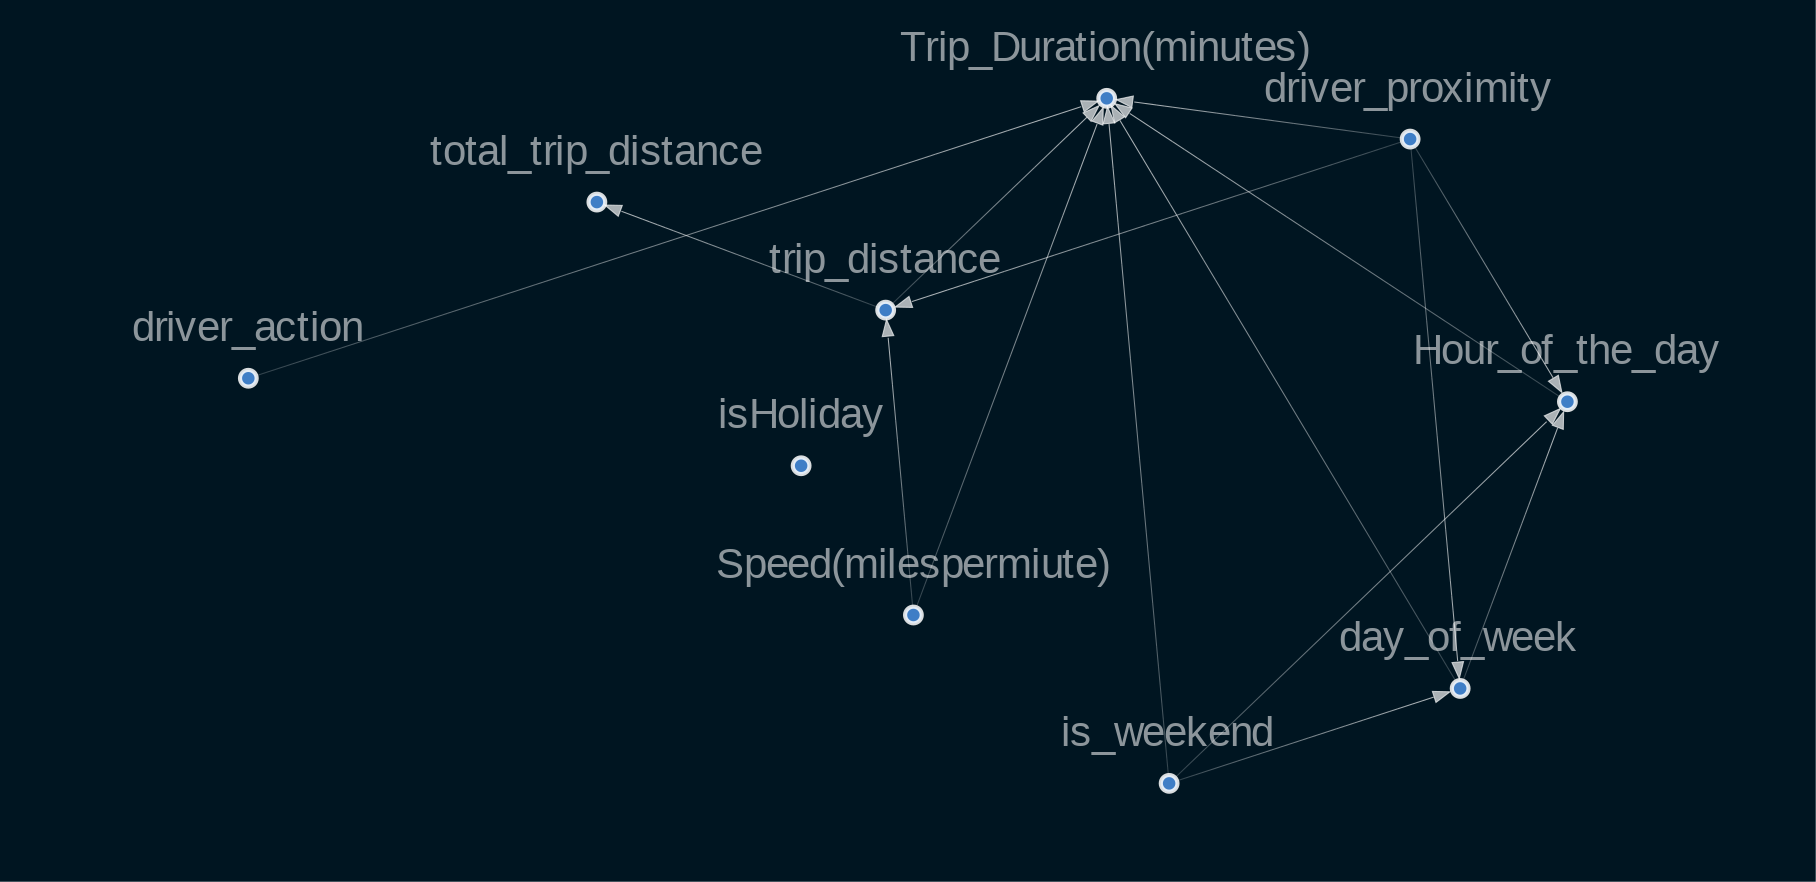

In [15]:
viz = plot_structure(
    structure_learning,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='circo',
)
Image(viz.draw(format='png'))

The above graph is all connected because no threshholding is applied.

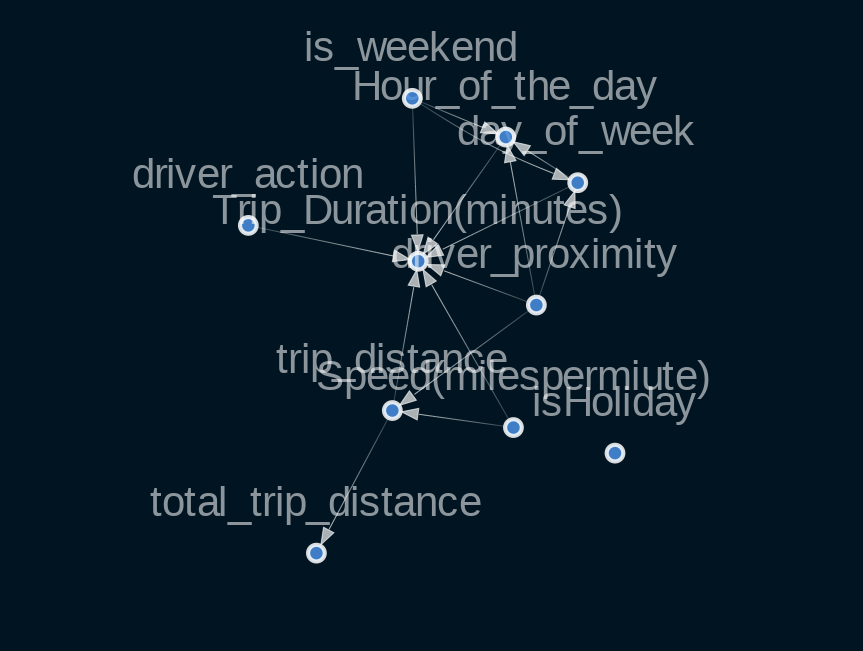

In [16]:
structure_learning.remove_edges_below_threshold(0.75)
viz = plot_structure(
    structure_learning,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [17]:
# Modifying the edges
structure_learning.remove_edge("is_weekend", "Hour_of_the_day")

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'driver_action', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


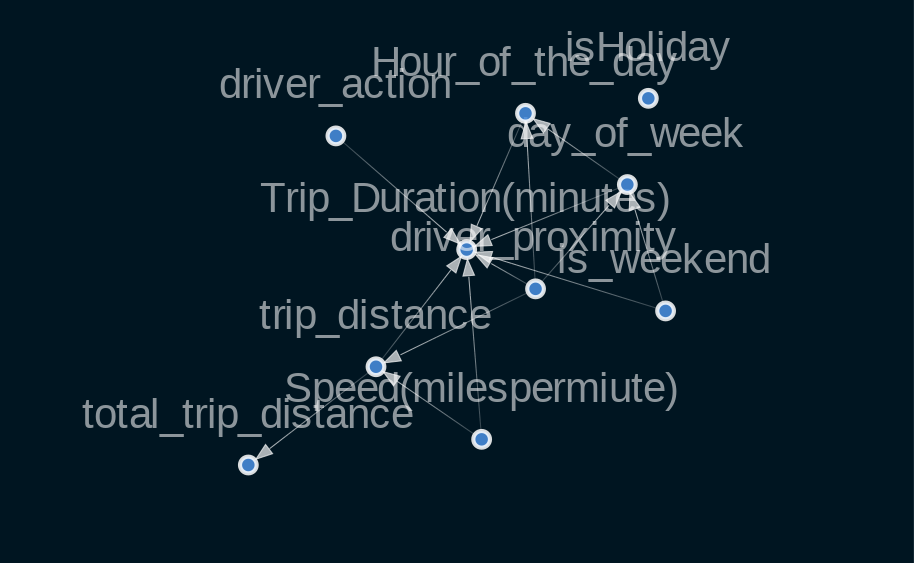

In [19]:
viz = plot_structure(
    structure_learning,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [21]:
# Modifying the nodes
structure_learning.remove_node("isHoliday")

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'driver_action', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


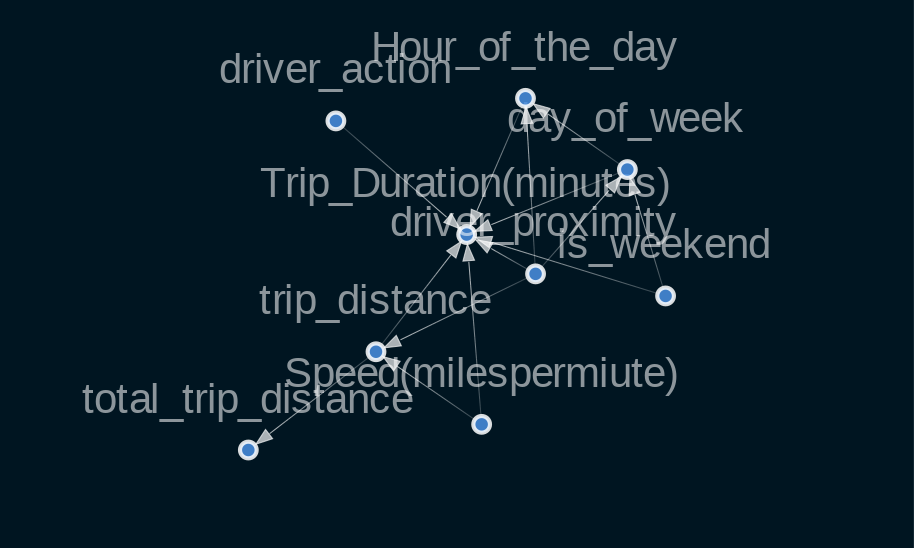

In [22]:
viz = plot_structure(
    structure_learning,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))